<a href="https://colab.research.google.com/github/InnaAndreeva/mmo_labs/blob/master/lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №5

## Линейные модели, SVM и деревья решений.

Цель лабораторной работы: изучение линейных моделей, SVM и деревьев решений.

### Задание:
Выберите набор данных (датасет) для решения задачи классификации или регрессии.
В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.

С использованием метода train_test_split разделите выборку на обучающую и тестовую.

Обучите следующие модели:
* одну из линейных моделей;
* SVM;
* дерево решений.
Оцените качество моделей с помощью трех подходящих для задачи метрик. Сравните качество полученных моделей.

Произведите для каждой модели подбор одного гиперпараметра с использованием GridSearchCV и кросс-валидации.

Повторите пункт 4 для найденных оптимальных значений гиперпараметров. Сравните качество полученных моделей с качеством моделей, полученных в пункте 4.

In [0]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import median_absolute_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz, plot_tree
import graphviz
# Enable inline plots
%matplotlib inline

## Выбор набора данных(датасета) и исследование его

In [2]:
data = pd.read_csv('camera_dataset.csv', sep=',')
data.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [3]:
data.shape 

(1038, 13)

In [4]:
data.dtypes 

Model                       object
Release date                 int64
Max resolution             float64
Low resolution             float64
Effective pixels           float64
Zoom wide (W)              float64
Zoom tele (T)              float64
Normal focus range         float64
Macro focus range          float64
Storage included           float64
Weight (inc. batteries)    float64
Dimensions                 float64
Price                      float64
dtype: object

In [5]:
data.isnull().sum() 

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          1
Storage included           2
Weight (inc. batteries)    2
Dimensions                 2
Price                      0
dtype: int64

## Удаление или заполнение пропусков и кодирование категориальных признаков

In [0]:
# кодирование категориальных признаков числовыми
le = LabelEncoder()
data['Model'] = le.fit_transform(data['Model'])

In [0]:
# заполнение 0 пропусков
data = data.fillna(0)

In [8]:
data.dtypes

Model                        int64
Release date                 int64
Max resolution             float64
Low resolution             float64
Effective pixels           float64
Zoom wide (W)              float64
Zoom tele (T)              float64
Normal focus range         float64
Macro focus range          float64
Storage included           float64
Weight (inc. batteries)    float64
Dimensions                 float64
Price                      float64
dtype: object

In [9]:
data.isnull().sum() 

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          0
Storage included           0
Weight (inc. batteries)    0
Dimensions                 0
Price                      0
dtype: int64

In [10]:
data.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,0,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,1,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,2,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,3,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,4,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


## С использованием метода train_test_split разделение выборки на обучающую и тестовую.

Разделим данные на целевой столбец и признаки.

In [0]:
 # Перейдем к разделению выборки на обучающую и тестовую.
X = data.drop('Price',axis = 1).values 
y = data['Price'].values 

Разделим выборку на тренировочную и тестовую.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(778, 12)
(778,)
(260, 12)
(260,)


## Обучение моделей

In [0]:
def test_model(model):
    print("mean_absolute_error:", mean_absolute_error(y_test, model.predict(X_test)))
    print("median_absolute_error:", median_absolute_error(y_test, model.predict(X_test)))
    print("r2_score:", r2_score(y_test, model.predict(X_test)))

* Линейная модель Ridge

In [15]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [16]:
# Проверим метрики построенной модели
test_model(ridge)

mean_absolute_error: 306.3038807132392
median_absolute_error: 165.30968988067252
r2_score: 0.37462185757821154


Данный метод без настройки гиперпараметров работает хуже, чем метод K ближайших соседей.

* SVM;

In [17]:
svr = SVR(kernel='linear', C=1.0)

svr.fit(X_train, y_train)

test_model(svr)

mean_absolute_error: 282.0231575952385
median_absolute_error: 80.92326189883352
r2_score: 0.10635427550256049


SVM показал результаты лучше по средней абсолютной ошибке, коэффициенте детерминации и медианной абсолютной ошибке чем Ridge.

* дерево решений.

In [18]:
dt_r = DecisionTreeRegressor(max_depth=None)
dt_r.fit(X_train, y_train)

test_model(dt_r)

mean_absolute_error: 184.8230769230769
median_absolute_error: 0.0
r2_score: 0.4429956343774656


Дерево решений показало достаточно хороший результат по сравнению с рассмотренными раньше методами. Однако, коэффициент детерминации больше, чем в методе SVM. 

# Подбор гиперпараметра K

* Линейная модель — Ridge

In [19]:
param_range = np.arange(0.001, 2.01, 0.1)
tuned_parameters = [{'alpha': param_range}]
tuned_parameters

[{'alpha': array([1.000e-03, 1.010e-01, 2.010e-01, 3.010e-01, 4.010e-01, 5.010e-01,
         6.010e-01, 7.010e-01, 8.010e-01, 9.010e-01, 1.001e+00, 1.101e+00,
         1.201e+00, 1.301e+00, 1.401e+00, 1.501e+00, 1.601e+00, 1.701e+00,
         1.801e+00, 1.901e+00, 2.001e+00])}]

In [20]:
gs = GridSearchCV(Ridge(), tuned_parameters,
cv=ShuffleSplit(n_splits=10), scoring="r2",return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

Ridge(alpha=2.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
reg = Ridge(**gs.best_params_)
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 306.26400065441203
median_absolute_error: 165.30140387399297
r2_score: 0.3746856932251066


При использовании метода Ridge с подобранными параметрами результат остается практически таким же.

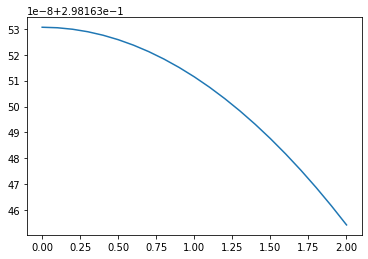

In [22]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

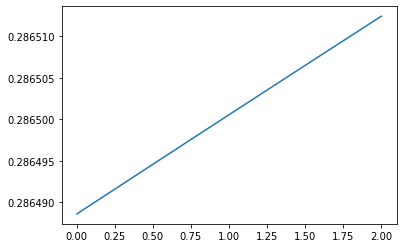

In [23]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [24]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 306.34387129507815
median_absolute_error: 165.31800124581423
r2_score: 0.3745577194481675


Аналогичный результат и при использовании линейной регрессии.

* SVM

In [0]:
tuned_parameters = [{'C': [1, 10, 100, 1000]}]

In [26]:
gs = GridSearchCV(SVR(), tuned_parameters, cv=ShuffleSplit(n_splits=10), scoring="r2", return_train_score=True, n_jobs=-1)
#, cv=ShuffleSplit(n_splits=10), scoring="r2", return_train_score=True, n_jobs=-1
gs.fit(X, y)
gs.best_estimator_

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [27]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 269.14927329575966
median_absolute_error: 73.93932701801725
r2_score: 0.212389939289774


С подобранными параметрами результаты значительно лучше.

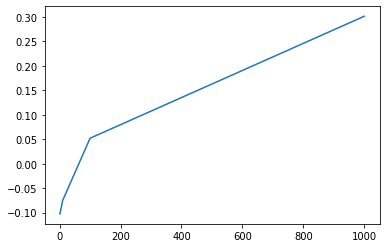

In [28]:
plt.plot(tuned_parameters[0]['C'], gs.cv_results_["mean_train_score"]);

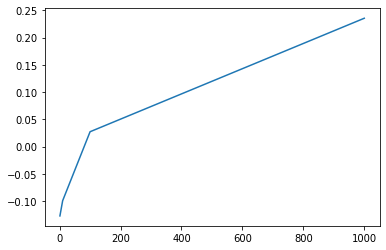

In [29]:
plt.plot(tuned_parameters[0]['C'], gs.cv_results_["mean_test_score"]);

* Дерево решений

In [30]:
param_range = np.arange(1, 51, 2)
tuned_parameters = [{'max_depth': param_range}]
tuned_parameters

[{'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
         35, 37, 39, 41, 43, 45, 47, 49])}]

In [31]:
gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters,
cv=ShuffleSplit(n_splits=10), scoring="r2",
return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=19,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

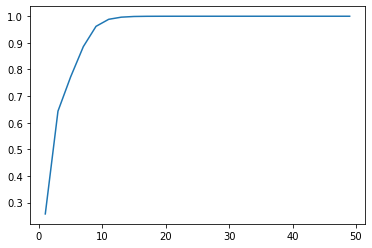

In [32]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

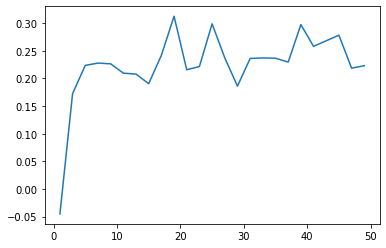

In [33]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [34]:
param_range = np.arange(15, 25, 1)
tuned_parameters = [{'max_depth': param_range}]
tuned_parameters

[{'max_depth': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24])}]

In [35]:
gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters,
cv=ShuffleSplit(n_splits=10), scoring="r2",
return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

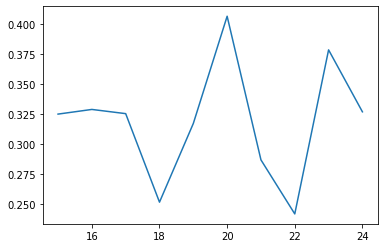

In [36]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [37]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 179.6846153846154
median_absolute_error: 0.0
r2_score: 0.3902964044398235


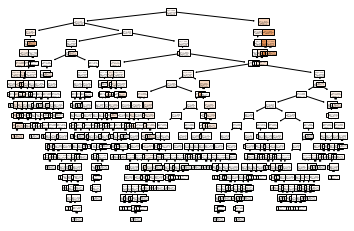

In [38]:
plot_tree(reg, filled=True);


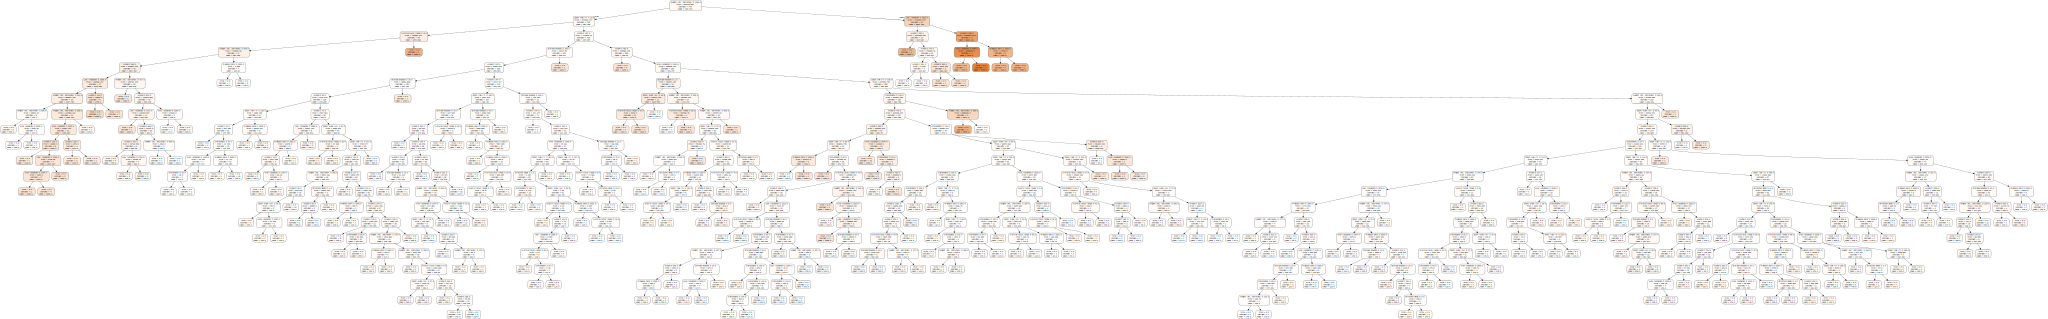

In [39]:
dot_data = export_graphviz(reg, out_file=None, feature_names=data.columns[:-1],
filled=True, rounded=True,
special_characters=True)
graph = graphviz.Source(dot_data)
graph


## Вывод 
Наибольшую точность дает модель, построенная при помощи дерева решений,

 затем идет SGD (стохастический градиентный метод), а потом линейный метод.